<a href="https://colab.research.google.com/github/prithvivinodnair/ML-Classification-Algorithms/blob/main/PA2_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


df = pd.read_csv('dataset_DT.csv')

print(df.head())

   age          job   marital  education default  balance housing loan  \
0   34  blue-collar    single  secondary      no    13408      no   no   
1   49   management  divorced   tertiary      no    20727      no   no   
2   32     services    single   tertiary      no     1743     yes   no   
3   46   management  divorced   tertiary      no    10469     yes   no   
4   26   management    single   tertiary      no     7628      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  1.0   apr       647         2     -1         0  unknown  no  
1  cellular  1.0   apr       285         3    132         2  failure  no  
2  cellular  1.0   apr      1156         1    261         3    other  no  
3  cellular  1.0   apr       202         2     -1         0  unknown  no  
4  cellular  1.0   apr       263         1     -1         0  unknown  no  


In [ ]:

# Replace 'unknown' values with NaN
df.replace("unknown", np.nan, inplace=True)

# Fill numerical columns with median values
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Fill categorical columns with mode (most frequent value)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month']
for column in categorical_columns:
    if df[column].dtype == 'object':  # This checks for non-numeric columns
        df[column].fillna(df[column].mode()[0], inplace=True)

# 2. Removing Duplicates
df.drop_duplicates(inplace=True)

df['age_group'] = pd.cut(df['age'], bins=[0, 25, 50, 75, 100], labels=['Young', 'Middle-aged', 'Senior', 'Old'])
df['balance_group'] = pd.cut(df['balance'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Drop original columns if replaced by bins
df.drop(['age', 'balance'], axis=1, inplace=True)



<ipython-input-3-88e3811f714e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-3-88e3811f714e>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
# Double-check for NaN and fill if any
if df.isnull().any().any():
    for col in df.columns:
        if df[col].dtype == 'object':  # Assuming categorical data
            df[col] = df[col].fillna(df[col].mode()[0])
        else:  # Assuming numerical data
            df[col] = df[col].fillna(df[col].median())


for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Assuming 'y' is your target variable
X = df.drop('y', axis=1)  # Features
y = df['y']               # Target

# Calculate Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Display the top six features based on mutual information
print("Top Six Features by Mutual Information:")
print(mi_scores.head(6))



Top Six Features by Mutual Information:
poutcome    0.034151
month       0.031634
duration    0.030526
balance     0.024165
pdays       0.022581
contact     0.021354
Name: MI Scores, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Initialize decision trees with different criteria and parameters
dtree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, random_state=42)
dtree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=42)

# Fit the model using Gini
dtree_gini.fit(X_train, y_train)

# Fit the model using Entropy
dtree_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

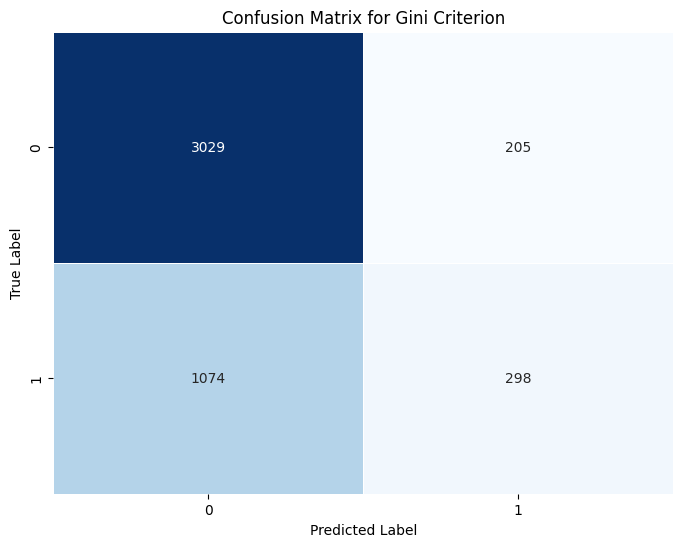

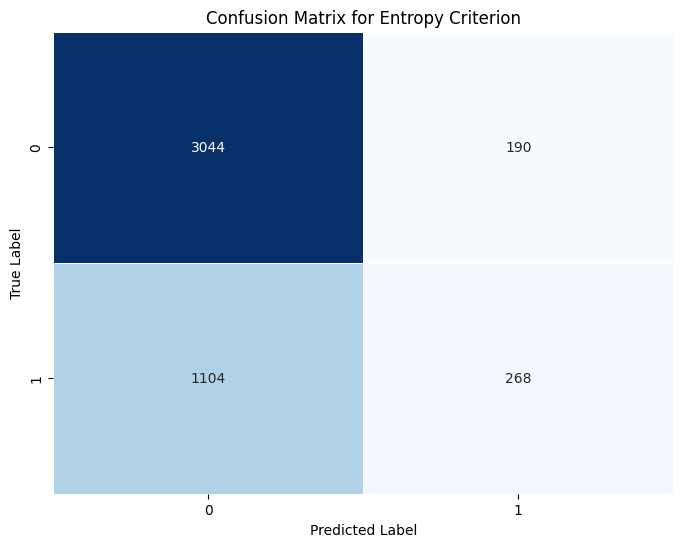

Classification Report for Gini Criterion:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      3234
           1       0.59      0.22      0.32      1372

    accuracy                           0.72      4606
   macro avg       0.67      0.58      0.57      4606
weighted avg       0.69      0.72      0.67      4606

Classification Report for Entropy Criterion:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82      3234
           1       0.59      0.20      0.29      1372

    accuracy                           0.72      4606
   macro avg       0.66      0.57      0.56      4606
weighted avg       0.69      0.72      0.67      4606



In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Use seaborn to create a heatmap of the confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Predict using both models
y_pred_gini = dtree_gini.predict(X_test)
y_pred_entropy = dtree_entropy.predict(X_test)

# Plot confusion matrix for Gini
plot_confusion_matrix(y_test, y_pred_gini, 'Confusion Matrix for Gini Criterion')

# Plot confusion matrix for Entropy
plot_confusion_matrix(y_test, y_pred_entropy, 'Confusion Matrix for Entropy Criterion')

# Print classification report for Gini
print("Classification Report for Gini Criterion:")
print(classification_report(y_test, y_pred_gini))

# Print classification report for Entropy
print("Classification Report for Entropy Criterion:")
print(classification_report(y_test, y_pred_entropy))

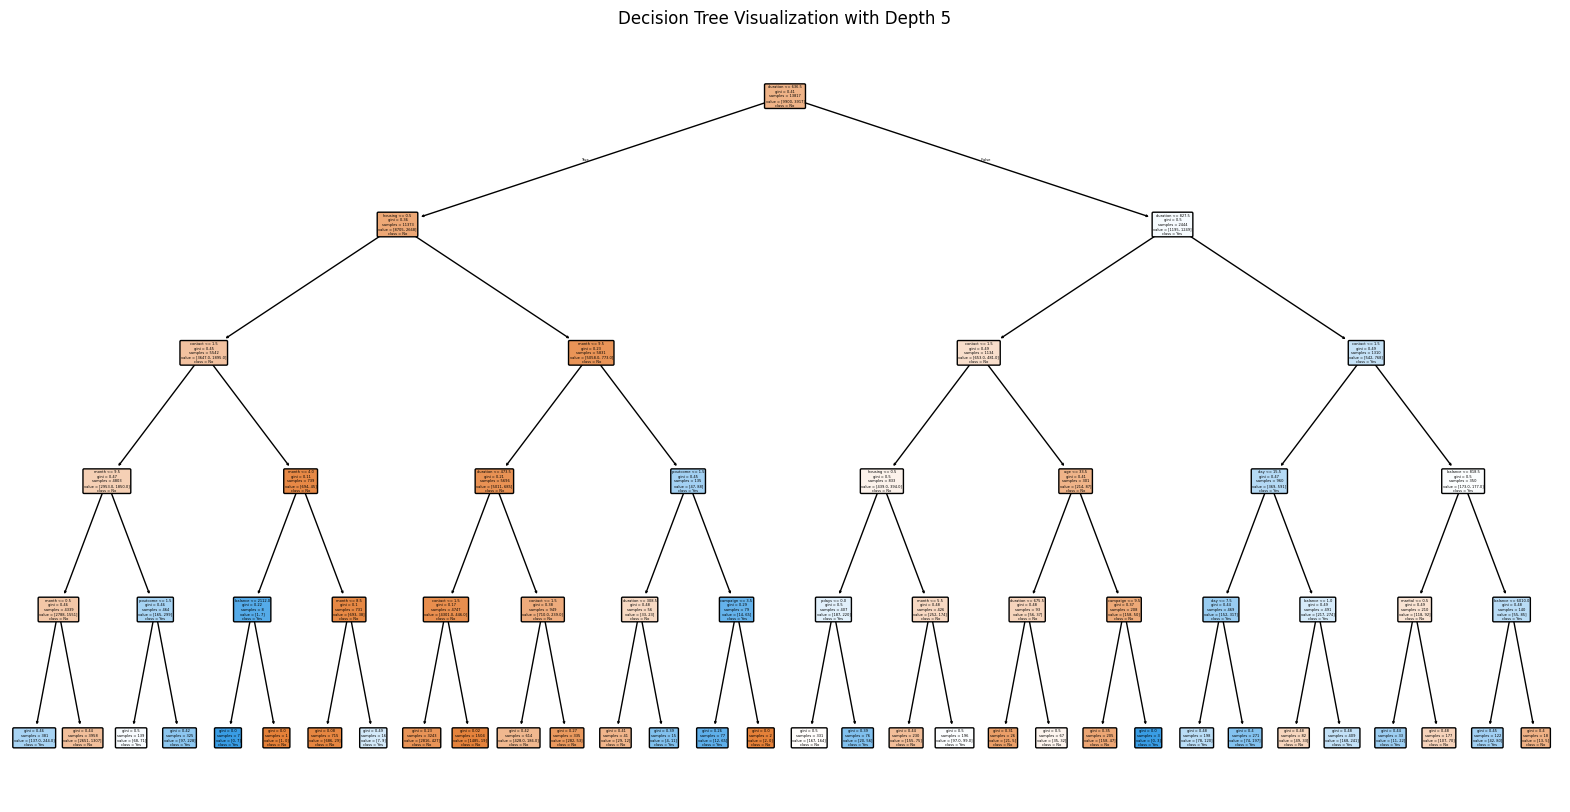

In [ ]:
dtree_viz = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree_viz.fit(X_train, y_train)

# Visualization
plt.figure(figsize=(20,10))  # Set the size of the figure, adjust to your needs
plot_tree(dtree_viz, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'], rounded=True, proportion=False, precision=2)
plt.title('Decision Tree Visualization with Depth 5')
plt.show()